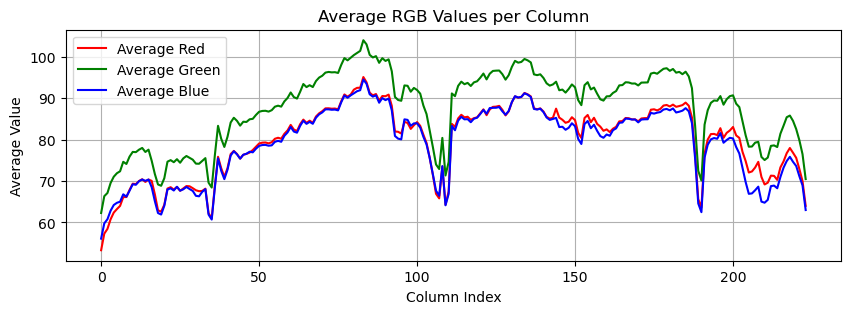

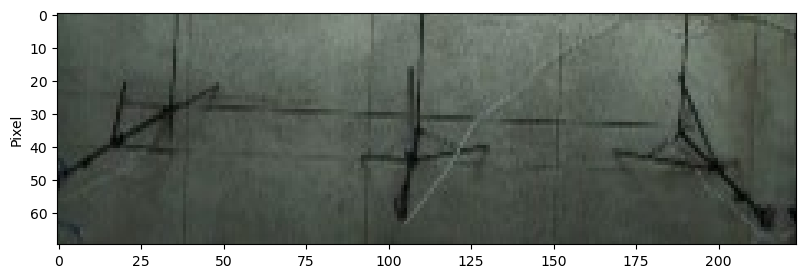

Analysis completed and results saved to 20240104_093025_bottom_rgb_analysis_result.xlsx


In [7]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os

def analyze_rgb_and_save_excel(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Create lists to store average RGB values for each column
    avg_red_values = []
    avg_green_values = []
    avg_blue_values = []

    # Iterate over each column in the image
    height, width, _ = image.shape
    for x in range(width):
        # Initialize total RGB values for the column
        total_red = 0
        total_green = 0
        total_blue = 0

        # Iterate over each pixel in the column
        for y in range(height):
            # Get RGB values of the pixel at (x, y)
            blue, green, red = image[y, x]

            # Accumulate RGB values for the column
            total_red += red
            total_green += green
            total_blue += blue

        # Calculate average RGB values for the column
        avg_red = total_red / height
        avg_green = total_green / height
        avg_blue = total_blue / height

        # Store average RGB values
        avg_red_values.append(avg_red)
        avg_green_values.append(avg_green)
        avg_blue_values.append(avg_blue)

    # Create a DataFrame from the average RGB values
    df = pd.DataFrame({
        'Column Index': range(width),
        'Average Red Value': avg_red_values,
        'Average Green Value': avg_green_values,
        'Average Blue Value': avg_blue_values
    })

    # Extract image file name (excluding extension)
    file_name = os.path.splitext(os.path.basename(image_path))[0]

    # Construct output Excel file name
    output_excel_name = f"{file_name}_rgb_analysis_result.xlsx"
    

    # Save the DataFrame to an Excel file
    df.to_excel(output_excel_name, index=False)

    # Plot the average RGB values
    plt.figure(figsize=(10, 3))
    plt.plot(df['Column Index'], df['Average Red Value'], color='red', label='Average Red')
    plt.plot(df['Column Index'], df['Average Green Value'], color='green', label='Average Green')
    plt.plot(df['Column Index'], df['Average Blue Value'], color='blue', label='Average Blue')
    plt.title('Average RGB Values per Column')
    plt.xlabel('Column Index')
    plt.ylabel('Average Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(15, 3))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.ylabel('Pixel')
#     plt.title('Original Image')
    plt.axis('on')
    plt.show()

    print("Analysis completed and results saved to", output_excel_name)

# Example usage:
analyze_rgb_and_save_excel('image/20240104_093025_bottom.jpg')